# Lab 4-7: Mixture Models+Model order selection

The goal of this lab session is to study mixture models. In the first part you will code the EM algorithm to estimate the parameters of a GMM given the number of mixed distributions and in the second part you will try different model order selection methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from GaussianMixtureModel import my_GMM
import utils.generators as generators
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

We will have two toy datasets to try the different methods:

## GMM

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. After estimation of those parameters we get an estimation of the distribution of our data. For the clustering task, one can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians. 

### First part

Fill in the following class to implement a multivariate GMM:

_Hypothesis : _ 

$$\forall i\in[\![1,n]\!]\; Z_{i}\sim\mathcal{M}(k,\pi)\text{  and  }\forall j\in[\![1,k]\!]\; X_{i}\mid\{Z_{i}=j\}\sim\mathcal{N}(\mu_{j},\Sigma_{j})$$

---


 Let $\theta$ denote our set of parameters and $N$ the matrix given by :

$$
N_{ij} = p_{\theta}(X_{i}=x_{i}\mid Z_{i}=j) = \mathcal{N}\left(x_{i}\mid \mu_{j}, \Sigma_{j}\right)
$$

Let the responsability matrix $\gamma$ be

$$\gamma_{ij} = p_{\theta}(Z_{i}=j\mid X_{i}=x_{i})$$

Then, $\forall i,j$, $\gamma_{ij}$ is given by : $$\gamma_{ij} = \frac{\pi_{j}N_{ij}}{\pi^{T}N_{i,\cdot}}$$

__(E) Step__:

If $\ell$ is our log-likelihood, the Expectation step boils down to the computation of the following expectation w.r.t the law of $Z\mid \{X=x\}$ : 

$$\mathbb{E}_{Z\mid X=x}[\ell(\theta)] = \sum_{i=1}^{n}\sum_{j=1}^{k}\gamma_{ij}\log N_{ij} + \sum_{i=1}^{n}\sum_{j=1}^{k}\gamma_{ij}\log\pi_{j}$$

__(M) Step__:

We compute the MLE for each parameter, namely $\forall j\in[\![1,k]\!]$

$$
\hat{\pi}_{j} = \frac{1}{n}\sum_{i}\gamma_{ij}
$$
$$
\hat{\mu}_{j} = \frac{\sum_{i}\gamma_{ij}x_{i}}{\sum_{i}\gamma_{ij}}
$$

$$
\hat{\Sigma}_{j} = \frac{\sum_{i}\gamma_{ij}(x_{i}-\hat{\mu}_{j})(x_{i}-\hat{\mu}_{j})^{T}}{\sum_{i}\gamma_{ij}}
$$

which can be read as the observations, weighted by their probabilty to belong to a given class

__Mass coverage ellipses :__

Let $X\sim\mathcal{N}(\mu,\Sigma)$. 

As $\Sigma\in\mathcal{S}^{++}_{d}(\mathbb{R})$, so is $\Sigma^{-1}$ and it hence admits a square root and induces a norm $\|\cdot\|_{\Sigma^{-1}}$. The problem is to find the radius of the circle centered on $\mu$ with $(1-\eta)\%$ coverage of the pdf wrt the latter norm.
	
	
But $$\displaystyle{\|X-\mu\|^{2}_{\Sigma^{-1}} \leq R^{2}\Leftrightarrow \|\underbrace{\sqrt{\Sigma^{-1}}(X-\mu)}_{\sim\mathcal{N}(0, I_{d})}\|^{2}_{2}\leq R^{2}}$$
	
$\|\cdot\|_{2}$ being the euclidean norm, this is basically a sum of univariate centered gaussian rv with variance 1 and therefore follows a $\chi^{2}$-distribution with d degrees of freedom. We can hence set $R^{2}$ to be the quantile of level $(1-\eta)$ of such distribution.

Generate your own mixture of Gaussian distributions to test the model, choose parameters so that GMM performs better than K-Means on it. Use `np.random.multivariate_normal`. 

Plot data with colors representing predicted labels and shapes representing real labels.

### Test on randomly generated dataset with various number of components

In [2]:
seeds = [73, 29, 17]

X = {2: [generators.gen_random_multivariate_normal(1000, 2, 2, seed) for seed in seeds],
     3: [generators.gen_random_multivariate_normal(1000, 2, 3, seed) for seed in seeds],
     4: [generators.gen_random_multivariate_normal(1000, 2, 4, seed) for seed in seeds]}

GaussianMixtureModel.py:68: RuntimeWarning: divide by zero encountered in log
  E_log_likelihood = np.sum(self.cond_prob_ * np.log(self.N_)) + np.sum(self.cond_prob_ * np.log(self.pi_))
GaussianMixtureModel.py:68: RuntimeWarning: invalid value encountered in multiply
  E_log_likelihood = np.sum(self.cond_prob_ * np.log(self.N_)) + np.sum(self.cond_prob_ * np.log(self.pi_))


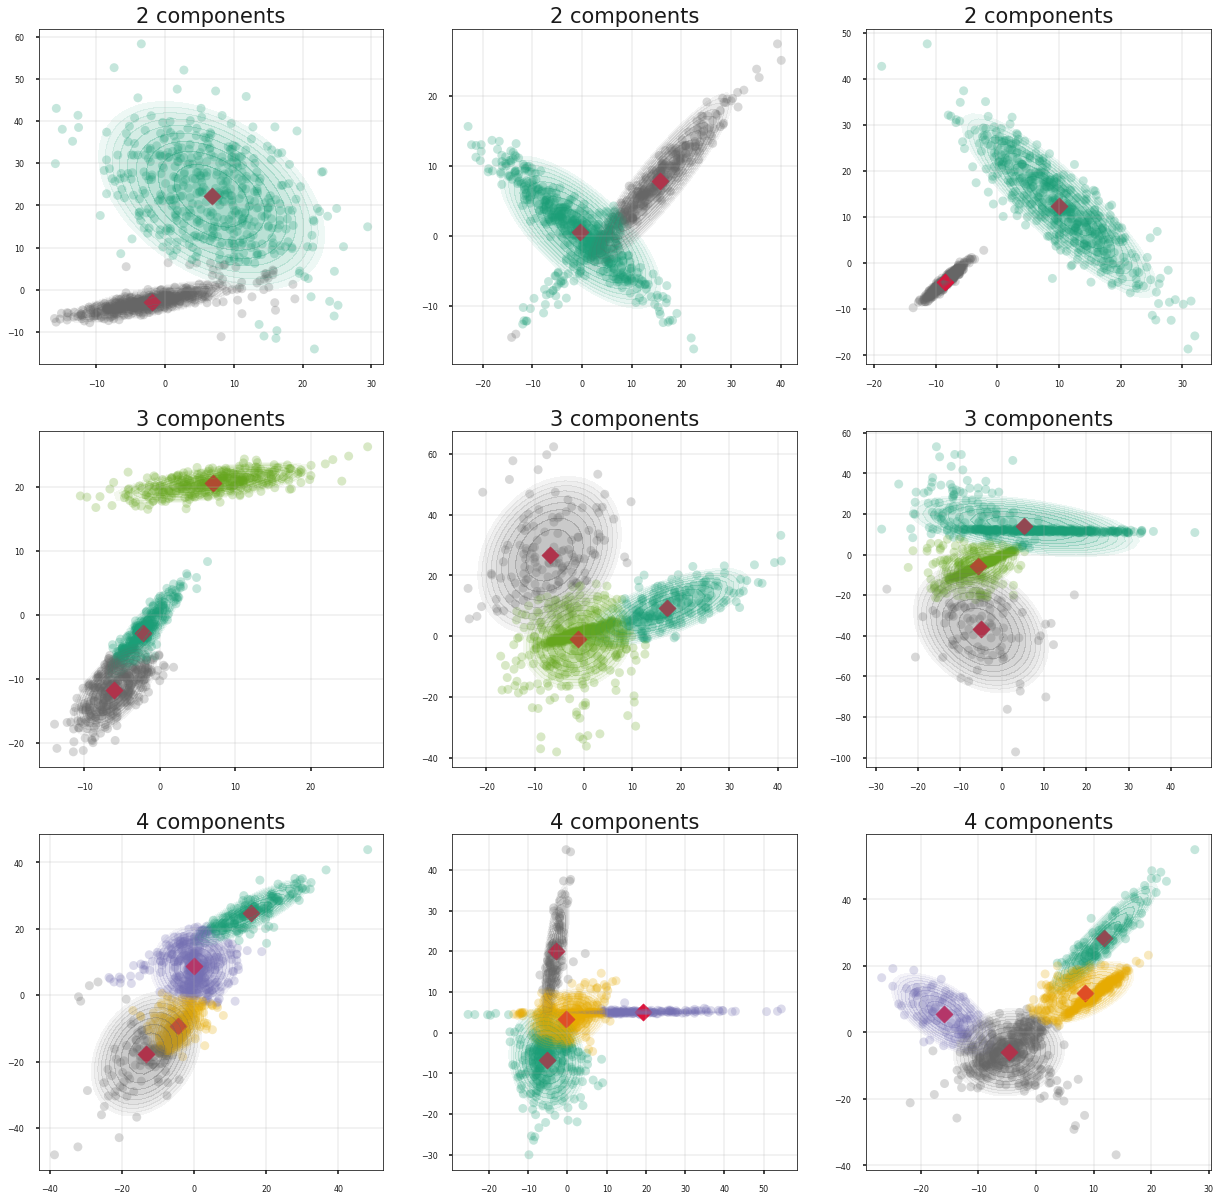

In [3]:
fig, ax = plt.subplots(3, 3, figsize=(21,21))

for i, item in enumerate(X.items()):
    for j, dataset in enumerate(item[1]):
        title = str(item[0]) + " components"
        gmm = my_GMM(k=item[0])
        gmm.fit(dataset)
        gmm.plot_pred(X=dataset,
              labels=gmm.labels_,
              title=title,
              plot_kwds=plot_kwds,
              ax=ax[i][j])
        ax[i][j].tick_params(axis='both', labelsize=8)

### Second Part
 
- Implement the seen information criterions (AIC, BIC, etc.) to select the number of clusters:

- Implement the merge criterions 
    - Correlation coefficients
    - Measuring Error 
    - Comparing the parameters

__AIC (Akaike Information Criterion):__

We recall the $AIC$ formula : 

$$
AIC(x, j) = \log p_{\hat{\theta}_{ML}}(x) - M_{j}
$$

Where $M_{j}$ is the number of unknown parameters for model $\mathcal{M}_{j}$ with MLE estimator $\hat{\theta}_{ML}$.


Wrt Gaussian Mixtures models, the log-likelihood is given by :

$$
\ell(\theta) = \sum_{i=1}^{n}\sum_{j=1}^{k}\mathbb{1}{\{x_{i}\in\mathcal{C}_{j}\}}\log N_{ij} + \sum_{i=1}^{n}\sum_{j=1}^{k}\mathbb{1}{\{x_{i}\in\mathcal{C}_{j}\}}\log\pi_{j}
$$

However, as we don't know to which cluster belongs a given sample, we can here use the expected log-likelihood to compute the $AIC$ by replacing $\mathbb{1}{\{x_{i}\in\mathcal{C}_{j}\}}$ by the responsability $\gamma_{ij}$


__BIC (Bayesian Information Criterion):__

For the $BIC$, we simply make the number of sample $N$ weight in too following :

$$
BIC(x, j) = \log p_{\hat{\theta}_{ML}}(x) - \frac{1}{2}NM_{j}
$$

## Merge Algorithms

We first implement a Merge model selection algorithm based on [SMEM Algorithm for Mixture Models](https://papers.nips.cc/paper/1521-smem-algorithm-for-mixture-models.pdf) paper (1999) introducing the posterior correlation merging criteria.

We then implement a second merging algorithm based on [A Kullback-Leibler Approach
to Gaussian Mixture Reduction](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.225.6327&rep=rep1&type=pdf), introducing a Kullback-Leibler-based discrimination criterion.

### Criterions definition

__Correlation Merge Criterion :__

Let $\textbf{P}_{j}(\theta) = \left[\,p_{\theta}(Z_{1}=j\mid x_{1})\,,\,\ldots\,,\,p_{\theta}(Z_{n}=j\mid x_{n})\,\right]^{T}$ the $j$-th component posterior probability vector

We define the merging criterion between components $j$ and $j'$ as the normalized inner product of their posterior probability vectors, i.e. :

$$
J_{merge}(j, j', \theta) = \frac{\textbf{P}_{j}(\theta)^{T}\textbf{P}_{j'}(\theta)}{\|\textbf{P}_{j}(\theta)\|\|\textbf{P}_{j'}(\theta)\|}
$$

For a given threshold $\varepsilon > 0$, components $j$ and $j'$ should be merged if $J_{merge}(j, j', \theta)\geq1-\varepsilon$

__KL Merge Criterion :__

Let $f$ and $g$ two probabilty densities over $\mathbb{R}^{d}$. Roughly speaking, small values of $D_{KL}(f\|g)$ mean that we would need very large samples so that the distinction between $f$ and $g$ becomes relevant.

Let $j$ and $j'$ denote candidates to a merge, $jj'$ the merged component and $\theta_{k}=(\pi_{k}, \mu_{k}, \Sigma_{k})$

$$
B(\theta_{j}, \theta_{j'}) = \pi_{j}D_{KL}\left(\mathcal{N}(\mu_{j}, \Sigma_{j})\|\mathcal{N}(\mu_{jj'}, \Sigma_{jj'})\right) + \pi_{j'}D_{KL}\left(\mathcal{N}(\mu_{j'}, \Sigma_{j'})\|\mathcal{N}(\mu_{jj'}, \Sigma_{jj'})\right)
$$

defines an upper bound for the discrimination of the mixture following the merge from the mixture before the merge, which can be simplified following:

$$
B(\theta_{j}, \theta_{j'}) = \frac{1}{2}\left[(\pi_{j} + \pi_{j'})\log\text{det}\Sigma_{jj'}-\pi_{j}\log\text{det}\Sigma_{j}-\pi_{j'}\log\text{det}\Sigma_{j'}\right]
$$

For a given threshold $\varepsilon>0$, components $j$ and $j'$ should be merged if $B(\theta_{j}, \theta_{j'}) \leq \varepsilon$

__Split Criterion :__

KL Divergence can also be used to define a splitting criterion.

Let $\hat{p}_{\theta}^{j}$ be the empirical distribution weighted by the posterior probabilities of the $j$-th components, i.e. 

$$
\hat{p}_{\theta}^{j}(x) = \frac{\sum_{i=1}^{n}\gamma_{ij}\mathbb{1}_{\{x_{i}\}}(x)}{\sum_{i=1}^{n}\gamma_{ij}}
$$

The splitting criterion of component j is defined through the local Kullback divergence following :

$$
J_{split}(j, \theta) = D_{KL}\left(\hat{p}_{\theta}^{j}\| p_{\theta_{j}}\right)
$$

where $p_{\theta_{j}}$ is the density specified by $(\mu_{j}, \Sigma_{j})$

Similarly, if $J_{split}(j, \theta)$ is great enough, components $j$ should be splitted

_This criterion will not be implemented in the next part_

### Implementation

__Merge :__

Until no pair of component's merging criterion is above the threshold :

- Compute all pairwise merge criteria and sort descending
- Merge first pair

Let $j$ and $j'$ the components to merge. We set :

$$
\pi_{jj'} = \pi_{j} + \pi_{j'}\quad\mu_{jj'} = \frac{\sum_{i}\gamma_{ij}\mu_{j}+\gamma_{ij'}\mu_{j'}}{\sum_{i}\gamma_{ij}+\gamma_{ij'}}\quad\Sigma_{jj'} = \frac{\sum_{i}\gamma_{ij}\Sigma_{j}+\gamma_{ij'}\Sigma_{j'}}{\sum_{i}\gamma_{ij}+\gamma_{ij'}}
$$

In [4]:
import ModelSelection as modelselec

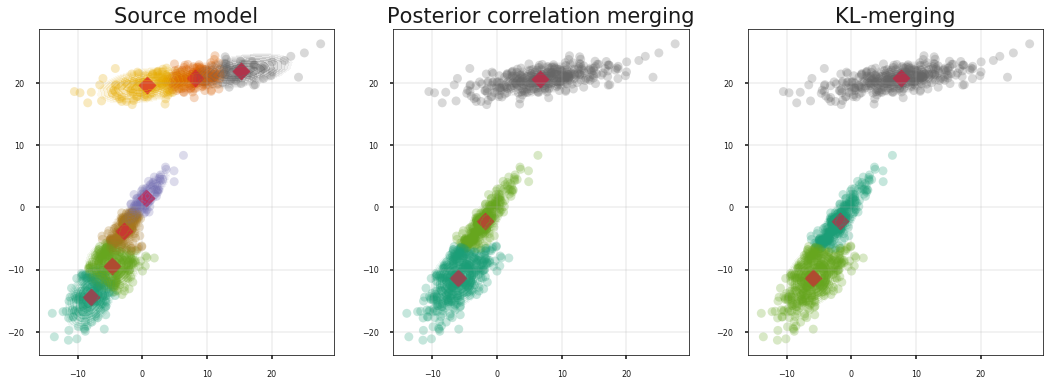

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

Z = X[3][0]
gmm = my_GMM(k=7)
gmm.fit(Z)
gmm.plot_pred(X=Z,
              labels=gmm.labels_,
              title="Source model",
              plot_kwds=plot_kwds,
              ax=ax[0])
ax[0].tick_params(axis='both', labelsize=8)

gmm_m = modelselec.run_merging(gmm, Z, criterion="correlation", threshold=0.9)
gmm_m.labels_ = gmm_m.predict(Z)
gmm_m.plot_pred(X=Z,
                labels=gmm_m.labels_,
                title="Posterior correlation merging",
                plot_kwds=plot_kwds,
                ax=ax[1])
ax[1].tick_params(axis='both', labelsize=8)

Z = X[3][0]
gmm = my_GMM(k=7)
gmm.fit(Z)
gmm_m = modelselec.run_merging(gmm, Z, criterion="kl", threshold=0.02)
gmm_m.labels_ = gmm_m.predict(Z)
gmm_m.plot_pred(X=Z,
                labels=gmm_m.labels_,
                title="KL-merging",
                plot_kwds=plot_kwds,
                ax=ax[2])
ax[2].tick_params(axis='both', labelsize=8)

- Implement cross-validation 

In [6]:
from sklearn.model_selection import KFold

In [7]:
def cross_validate(X, labels, model, nr_folds):
    kfolds = KFold(n_splits=nr_folds)
    nr_sample = len(X)
    
    labels_pred = np.repeat(None, nr_sample)
    
    for train_index, test_index in kfolds.split(X):
        model.fit(X[train_index])
        labels_pred[test_index] = model.predict(X[test_index])
    
    nr_missclassif = float(len(np.where(labels_pred != labels)[0]))
    missclassification_rate = nr_missclassif / nr_sample
    return missclassification_rate

## Application

Use the model selection criterions to choose the number of clusters for the two given datasets (data-MM-i.csv). Compare the results and the computational time. Try to visually validate your results.

In [8]:
import pandas as pd
import tqdm
from sklearn.manifold import TSNE

### Loading datasets

In [9]:
data_MM_1 = pd.read_csv("data/data_MM_1.csv")
data_MM_2 = pd.read_csv("data/data_MM_2.csv")

print "Shape dataset 1 : ", data_MM_1.shape
print "Shape dataset 2 : ", data_MM_2.shape

data_MM_1 = data_MM_1.values
data_MM_2 = data_MM_2.values

data_MM = {1: data_MM_1, 2: data_MM_2}

Shape dataset 1 :  (999, 3)
Shape dataset 2 :  (1499, 4)


### Visualization

We start by plotting a dimension-reduced model to get a first guess of the number of clusters

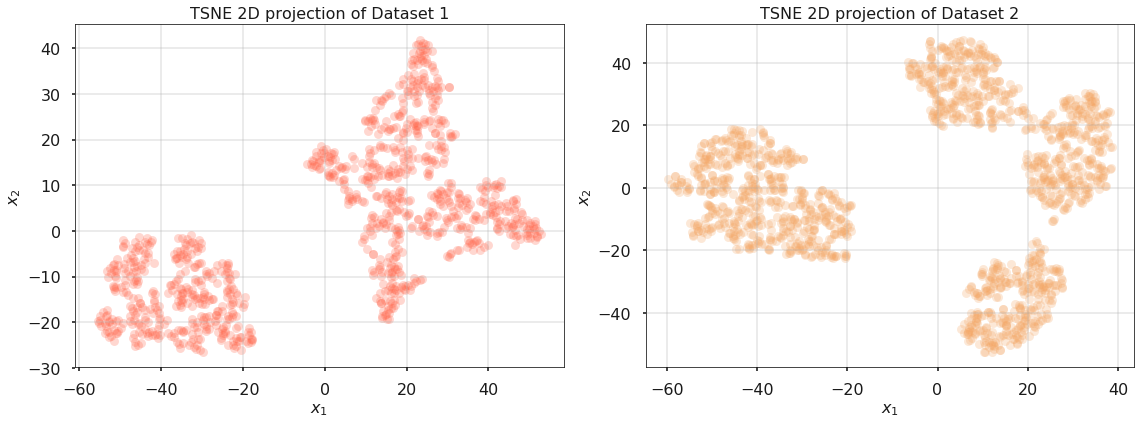

In [10]:
tsne = TSNE(n_components=2)
tsne1 = tsne.fit_transform(data_MM[1])
tsne2 = tsne.fit_transform(data_MM[2])

fig, ax = plt.subplots(1, 2, figsize=(16,6))

ax[0].scatter(*tsne1.T, color="tomato", **plot_kwds)
ax[0].grid(alpha=0.3)
ax[0].set_xlabel(r"$x_{1}$", size=16)
ax[0].set_ylabel(r"$x_{2}$", size=16)
ax[0].set_title("TSNE 2D projection of Dataset 1", size=16)


ax[1].scatter(*tsne2.T, color = "sandybrown", **plot_kwds)
ax[1].grid(alpha=0.3)
ax[1].set_xlabel(r"$x_{1}$", size=16)
ax[1].set_ylabel(r"$x_{2}$", size=16)
ax[1].set_title("TSNE 2D projection of Dataset 2", size=16)

plt.tight_layout()

### MODEL ORDER SELECTION

### AIC and BIC

In [11]:
range_k_1 = range(1, 15)
range_k_2 = range(1, 15)
range_k = {1: range_k_1, 2: range_k_2}
AIC = {1:[], 2:[]}
BIC = {1:[], 2:[]}

for dataset_idx, dataset_range in range_k.items():
    for k in dataset_range:
        gmm = my_GMM(k=k)
        gmm.fit(data_MM[dataset_idx])
        AIC[dataset_idx] += [modelselec.AIC(gmm, data_MM[dataset_idx])]
        BIC[dataset_idx] += [modelselec.BIC(gmm, data_MM[dataset_idx])]

GaussianMixtureModel.py:274: RuntimeWarning: divide by zero encountered in log
  E_log_likelihood = np.sum(self.cond_prob_ * np.log(N_)) + np.sum(self.cond_prob_ * np.log(self.pi_))
GaussianMixtureModel.py:274: RuntimeWarning: invalid value encountered in multiply
  E_log_likelihood = np.sum(self.cond_prob_ * np.log(N_)) + np.sum(self.cond_prob_ * np.log(self.pi_))


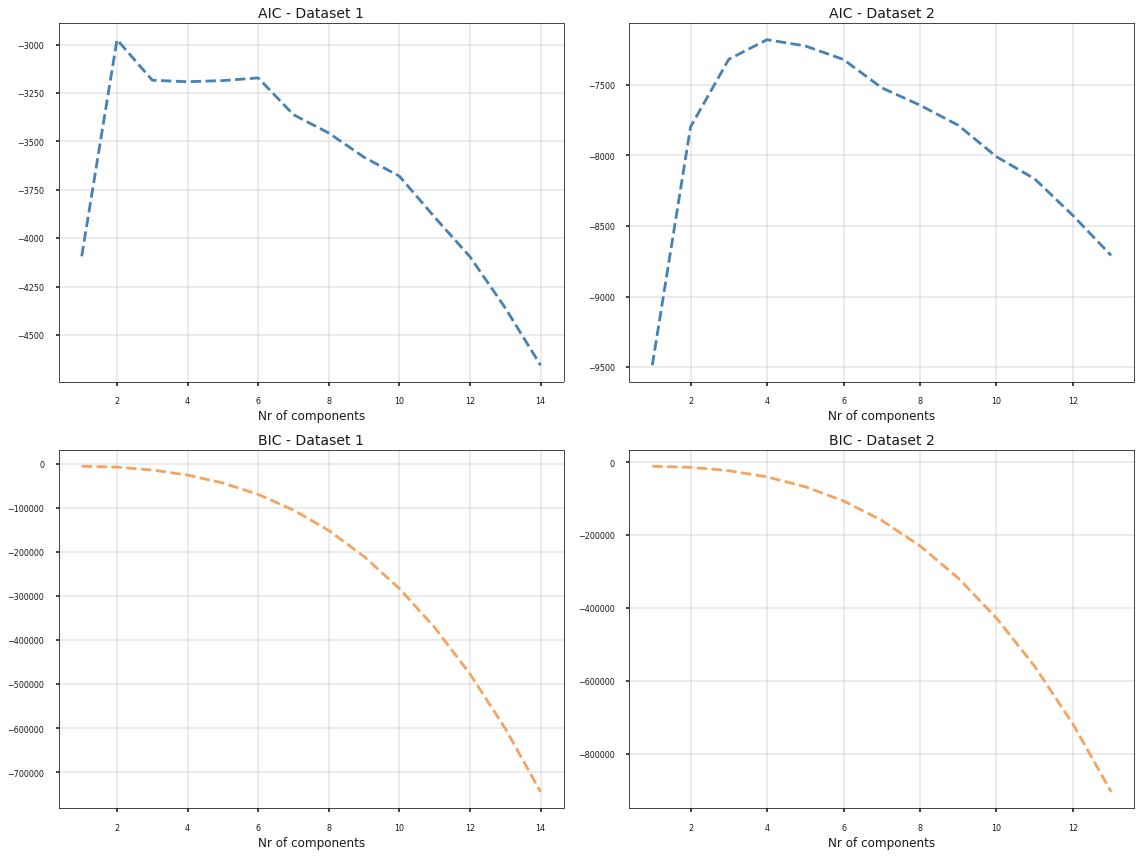

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

for (dataset_idx, dataset_range) in data_MM.items():
    ax[0, dataset_idx - 1].plot(range_k[dataset_idx], AIC[dataset_idx], '--', color="steelblue")
    ax[0, dataset_idx - 1].grid(alpha=0.3)
    title_0 = "AIC - Dataset " + str(dataset_idx)
    ax[0, dataset_idx - 1].set_title(title_0, size=14)
    ax[0, dataset_idx - 1].set_xlabel("Nr of components", size=12)
    ax[0, dataset_idx - 1].tick_params(axis='both', labelsize=8)
    ax[1, dataset_idx - 1].plot(range_k[dataset_idx], BIC[dataset_idx], '--', color="sandybrown")
    ax[1, dataset_idx - 1].grid(alpha=0.3)
    title_1 = "BIC - Dataset " + str(dataset_idx)
    ax[1, dataset_idx - 1].set_title(title_1, size=14)
    ax[1, dataset_idx - 1].set_xlabel("Nr of components", size=12)
    ax[1, dataset_idx - 1].tick_params(axis='both', labelsize=8)
plt.tight_layout()

- __Dataset 1:__
> $BIC$ doesn't bring any relevant insight wrt the optimal number of components as it is continuously decreasing, except that the number of components should be small. Inversely, $AIC$ is maximized for 2 components which is consistent with our TSNE observations. Also, the $AIC$ is still reasonably high up to 6 components which is consistent with another reading of the TSNE where the star-shaped cluster would actually be 4 different clusters.

- __Dataset 2:__
> Same goes for $BIC$ while $AIC$ is maximized for 4 components which is once again consistent with the dimensionality reduction model plotted

### Merge criterions

#### Correlation criterion

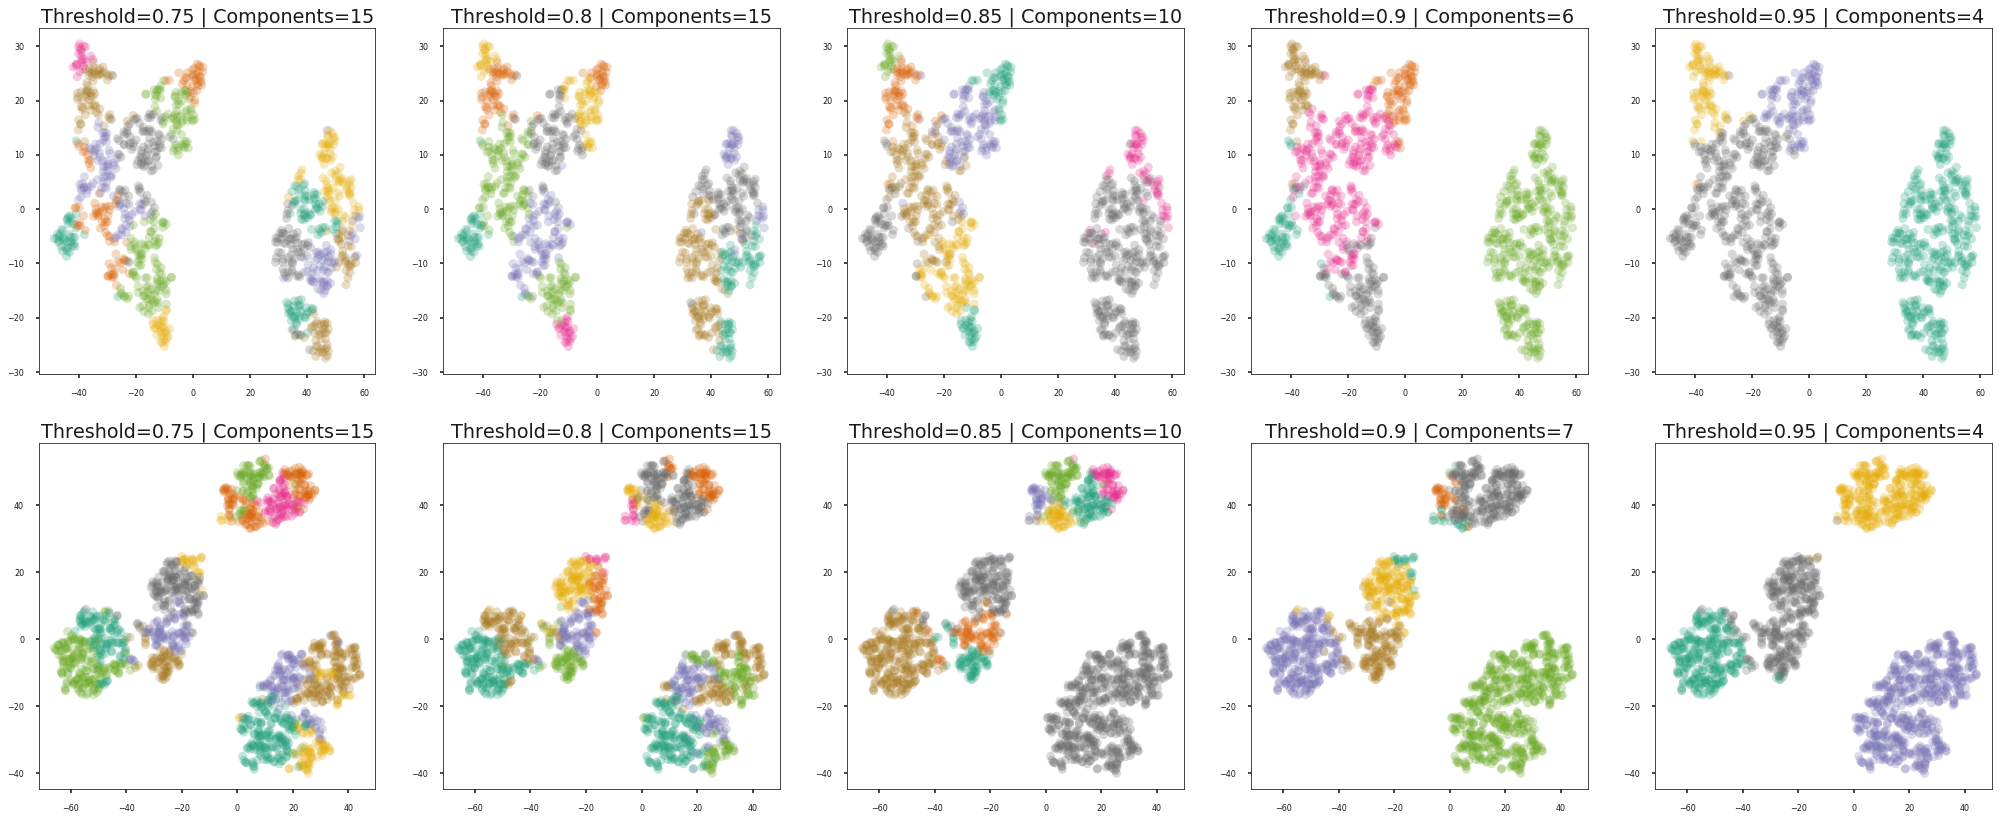

In [30]:
initial_nr_components = 15
range_threshold = np.linspace(0.75, 0.95, 5)

fig, ax = plt.subplots(2, len(range_threshold), figsize=(len(range_threshold)*7, 14))


for i, dataset in enumerate(data_MM.values()):
    Z = dataset
    tsne = TSNE(n_components=2).fit_transform(Z) 
    for j, threshold in enumerate(range_threshold):
        gmm = my_GMM(k=initial_nr_components)
        gmm.fit(Z)
        gmm_m = modelselec.run_merging(gmm, Z, criterion="correlation", threshold=threshold)
        gmm_m.labels_ = gmm_m.predict(Z)
        ax[i, j].scatter(*tsne.T, c=gmm_m.labels_, cmap=plt.cm.Dark2, **plot_kwds)
        title = "Threshold=" + str(round(threshold, 2)) + " | Components=" + str(gmm_m.k_) 
        ax[i, j].set_title(title)
        ax[i, j].tick_params(axis='both', labelsize=8)
        ax[i, j].grid(alpha=0.2)

#### KL-criterion

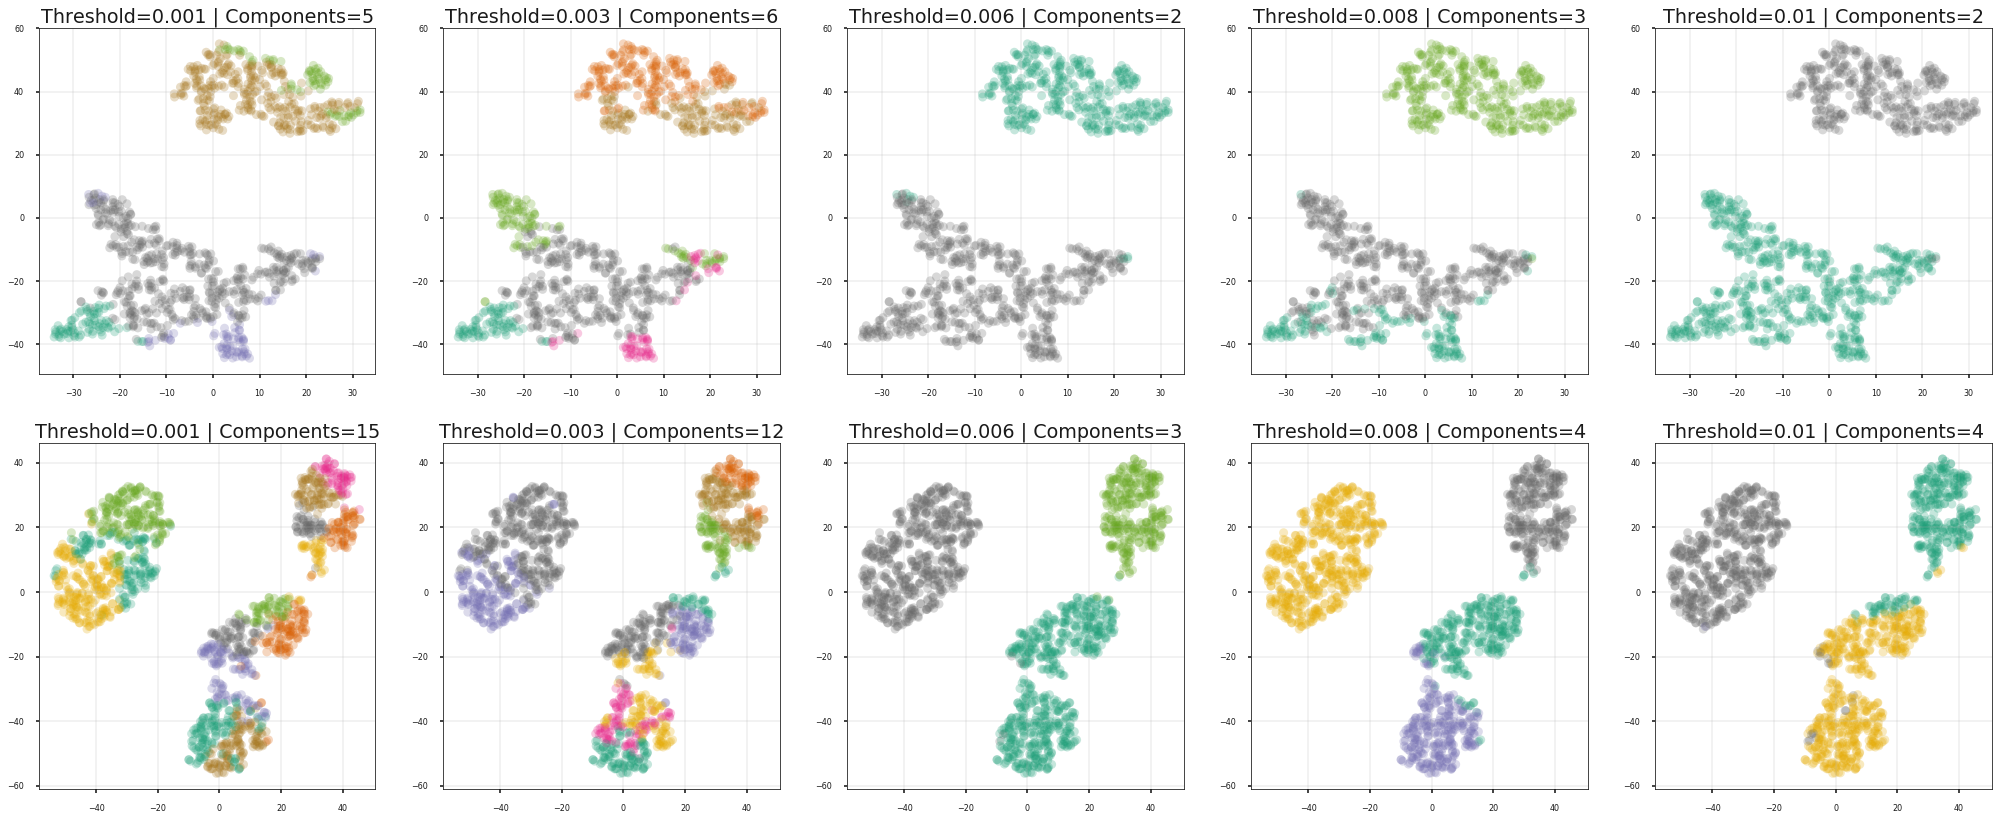

In [31]:
initial_nr_components = 15
range_threshold = np.linspace(0.001, 0.01, 5)

fig, ax = plt.subplots(2, len(range_threshold), figsize=(len(range_threshold)*7, 14))


for i, dataset in enumerate(data_MM.values()):
    Z = dataset
    tsne = TSNE(n_components=2).fit_transform(Z) 
    for j, threshold in enumerate(range_threshold):
        gmm = my_GMM(k=initial_nr_components)
        gmm.fit(Z)
        gmm_m = modelselec.run_merging(gmm, Z, criterion="kl", threshold=threshold)
        gmm_m.labels_ = gmm_m.predict(Z)
        ax[i, j].scatter(*tsne.T, c=gmm_m.labels_, cmap=plt.cm.Dark2, **plot_kwds)
        title = "Threshold=" + str(round(threshold, 3)) + " | Components=" + str(gmm_m.k_) 
        ax[i, j].set_title(title)
        ax[i, j].tick_params(axis='both', labelsize=8)
        ax[i, j].grid(alpha=0.2)

## Application

You are going to work with the following data:

('shape:', (1797, 64))


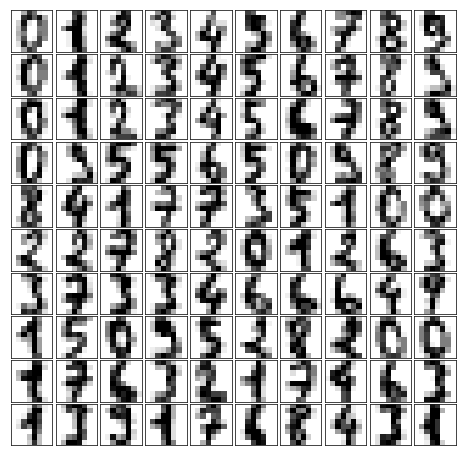

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()
print("shape:", digits.data.shape)

def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

Model your data with your GMM class using a model order selection method and produce new synthetic handwritten numbers. You should use PCA to reduce the dimension as GMM doesn't perform well in high-dimensional contexts. 

__PCA__

In [34]:
from sklearn.decomposition import PCA

In [63]:
pca = PCA(0.99, whiten=True)
pca_data = pca.fit_transform(digits.data)
pca_data.shape

(1797, 41)

In [73]:
# LONG PROCESS
range_k_pca = range(1, 150)
AIC_pca = []
BIC_pca = []

for k in range_k_pca:
    try:
        gmm = my_GMM(k=k, initialization="random")
        gmm.fit(pca_data)
        AIC_pca += [modelselec.AIC(gmm, pca_data)]
        BIC_pca += [modelselec.BIC(gmm, pca_data)]
    except np.linalg.LinAlgError:
        AIC_pca += [np.nan]
        BIC_pca += [np.nan]

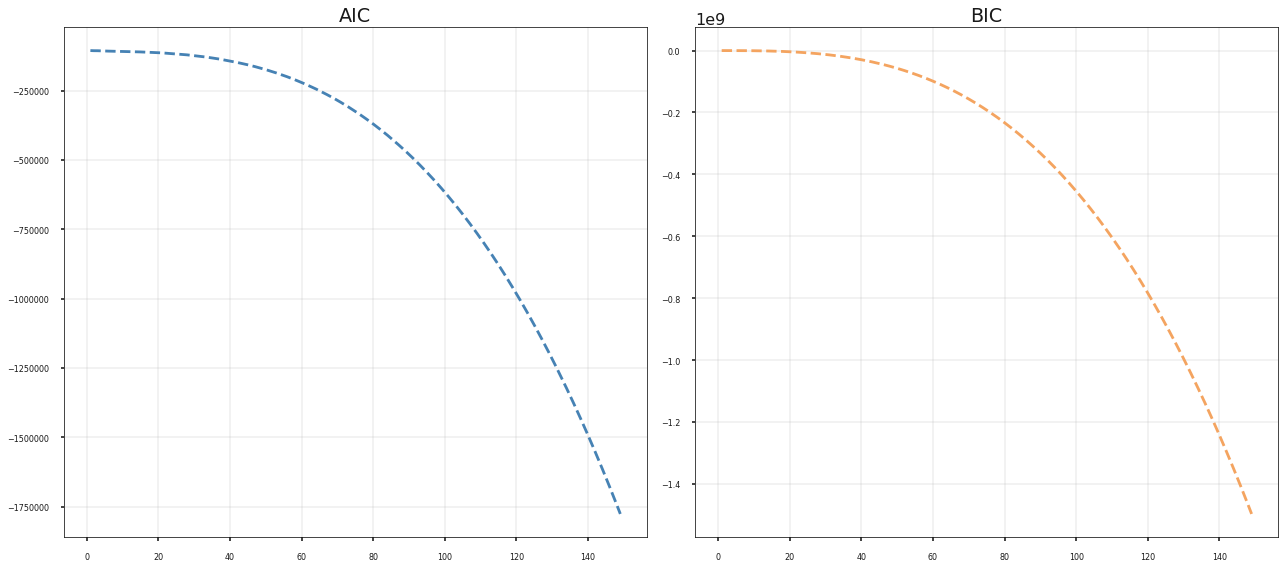

In [79]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].plot(range_k_pca, AIC_pca, '--', color="steelblue")
ax[0].set_title("AIC")
ax[0].tick_params(axis='both', labelsize=8)
ax[0].grid(alpha=0.2)

ax[1].plot(range_k_pca, BIC_pca, '--', color="sandybrown")
ax[1].set_title("BIC")
ax[1].tick_params(axis='both', labelsize=8)
ax[1].grid(alpha=0.2)

plt.tight_layout()

In [80]:
gmm = my_GMM(k=100, initialization="random")
gmm.fit(pca_data)

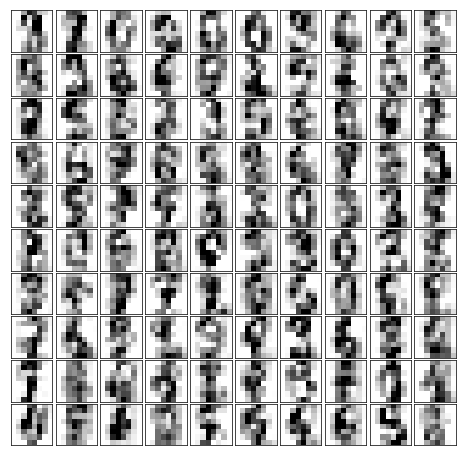

In [67]:
X = generators.gen_multivariate_normal(100, gmm.mu_, gmm.Sigma_)
digits_gmm = pca.inverse_transform(X)
plot_digits(digits_gmm)